# Seaborn: heatmap

In [1]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np

In [2]:
cars = sns.load_dataset('mpg')

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Intro Visuals

In [4]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [5]:
xlabels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
ylabels = ['Coffee', 'Juice', 'Soda', 'Tea']

orders = np.array([[44, 31, 50, 41, 30], 
                   [21, 12, 28, 38, 35],
                   [15, 18, 20, 14, 12],
                   [38, 29, 39, 26, 11]]
                 )

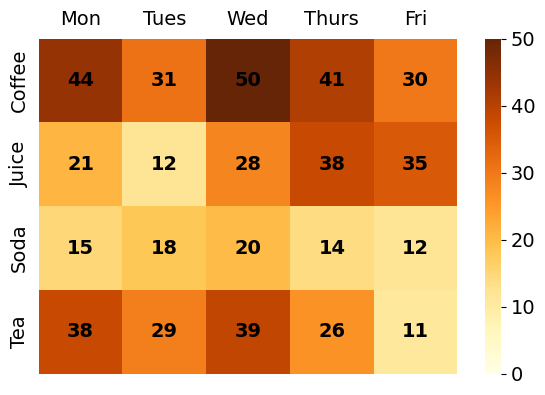

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            #alpha=0.6,  # for transperancy
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=90)  # the angle at which the labels should be displayed
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True
) 
plt.tight_layout();

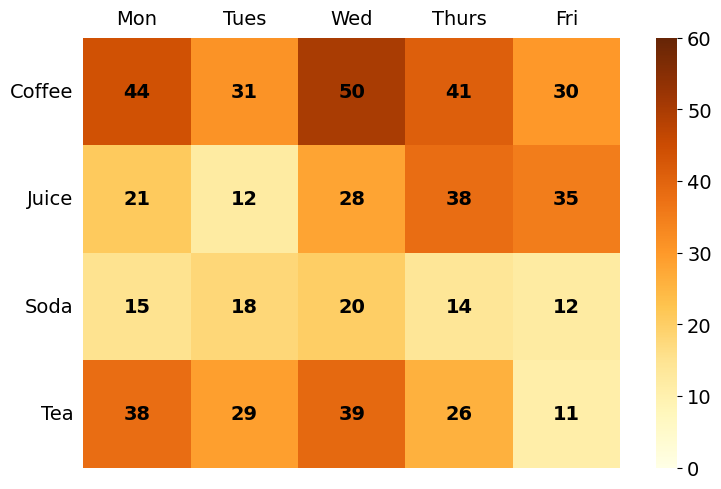

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            vmax= 60,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True) 
plt.tight_layout();

#### Color Palette Overlay

In [24]:
origin_cyl_arr = np.array([[  0.,  63.,   3.,   4.,   0.],
                           [  4.,  69.,   0.,   6.,   0.],
                           [  0.,  72.,   0.,  74., 103.]])

origin_cyl_arr

array([[  0.,  63.,   3.,   4.,   0.],
       [  4.,  69.,   0.,   6.,   0.],
       [  0.,  72.,   0.,  74., 103.]])

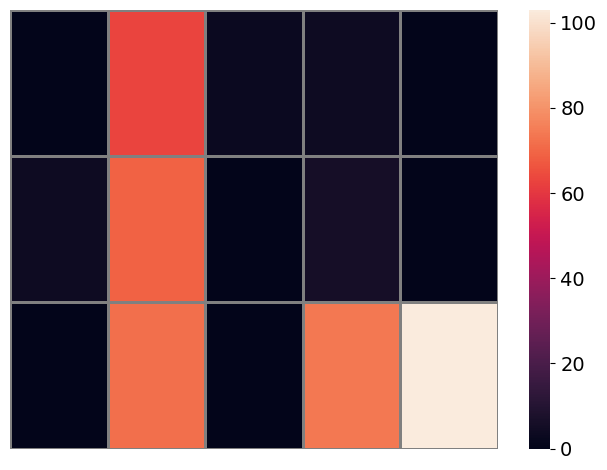

In [25]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='rocket',
            linewidth=1,
            linecolor='gray'
           )
plt.tight_layout();

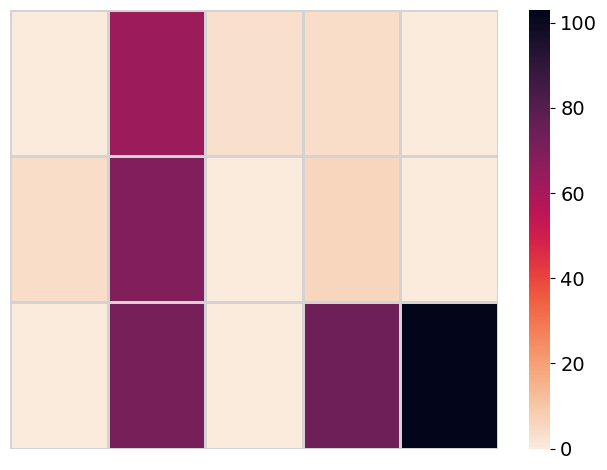

In [26]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='rocket_r',
            linewidth=1,
            linecolor='lightgray'
           )
plt.tight_layout();

#### Annotation Overlay

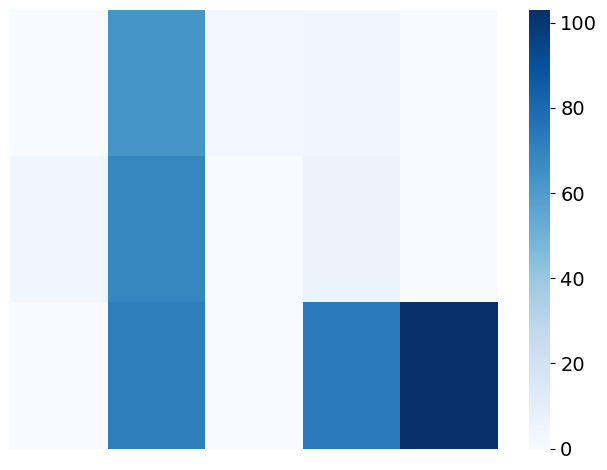

In [27]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='Blues'
           )
plt.tight_layout();

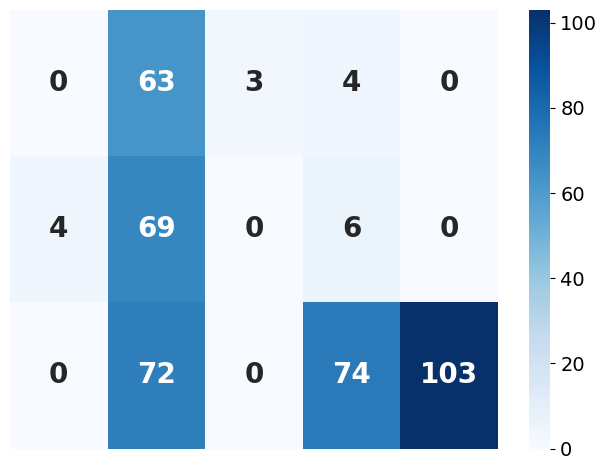

In [28]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='Blues',
            annot=True,
            fmt='.0f',  # to define the number of significant values, in this case there should be no decimal places
            annot_kws={'fontsize':20, 'fontweight': 'bold'}
           )
plt.tight_layout();
plt.savefig('11heatmap_example_withannot.svg')

In [29]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Basics

In [30]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [34]:
(cars
 .groupby('origin')
 .cylinders
 .value_counts()
 .unstack()
 .fillna(0)
)

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


In [35]:
origin_cyl = (
    cars
    .groupby('origin')
    .cylinders
    .value_counts()
    .unstack()
    .fillna(0)
)

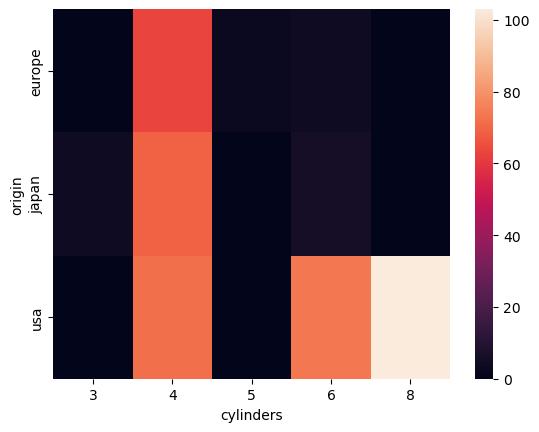

In [36]:
sns.heatmap(origin_cyl);

### Arrays

In [37]:
test_array = np.array([[1, 2], [3, 4]])

test_array

array([[1, 2],
       [3, 4]])

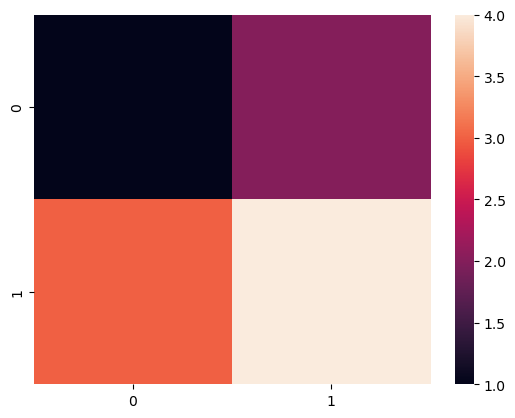

In [38]:
sns.heatmap(test_array);

### Transpose

In [39]:
origin_cyl.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


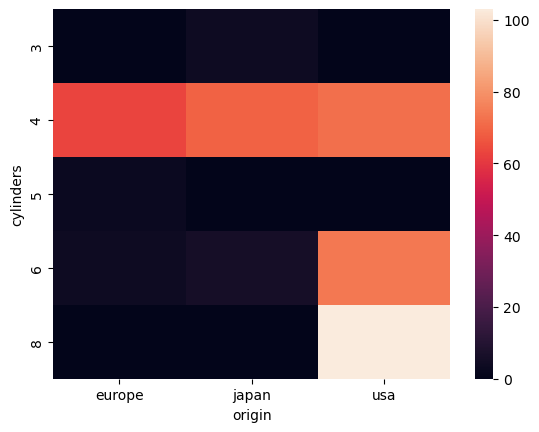

In [40]:
sns.heatmap(origin_cyl.T);

### Correlation

In [45]:
cars.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


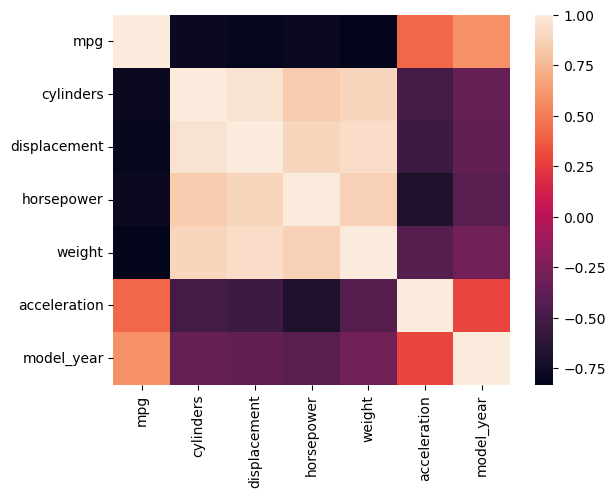

In [47]:
sns.heatmap(cars.corr(numeric_only=True));

## Color Palette

Seaborn offers 170 different color palette options.  Check out this great [post](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f) to view them all.

We'll start with a SEQUENTIAL palette.

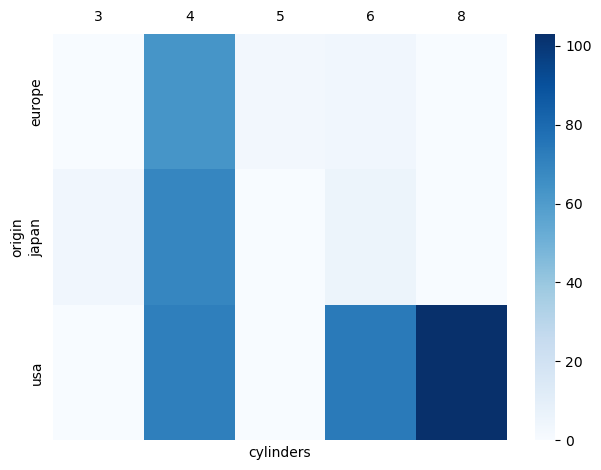

In [51]:
sns.heatmap(origin_cyl, cmap="Blues");
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True
) 
plt.tight_layout();

Now let's try a DIVERGING palette.

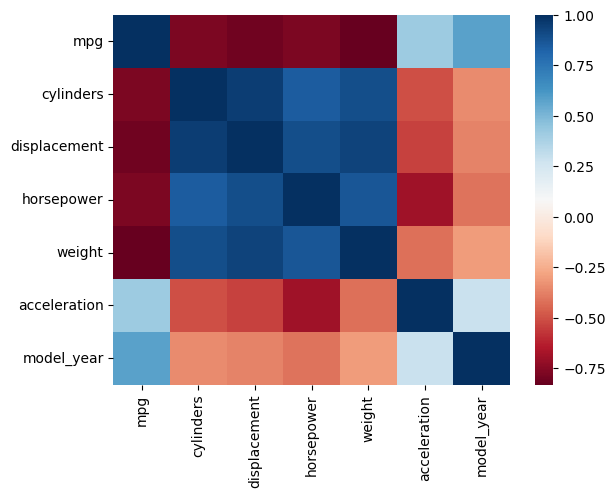

In [53]:
sns.heatmap(cars.corr(numeric_only=True), cmap='RdBu');

### Controling the Colorbar Range: center, vmax, vmin

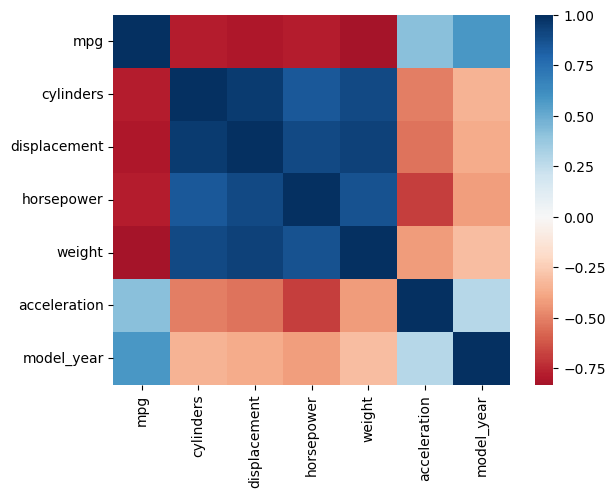

In [54]:
sns.heatmap(cars.corr(numeric_only=True), cmap='RdBu', center=0); # center=0 means to center the 0 at white color perfectly

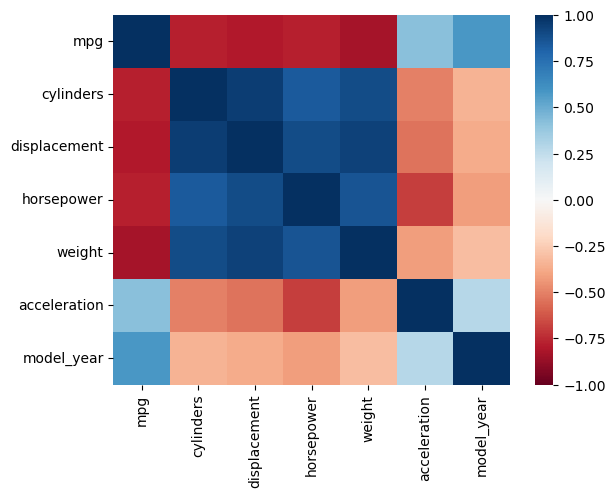

In [57]:
sns.heatmap(cars.corr(numeric_only=True), cmap='RdBu', vmin=-1, vmax=1);

## Annotations

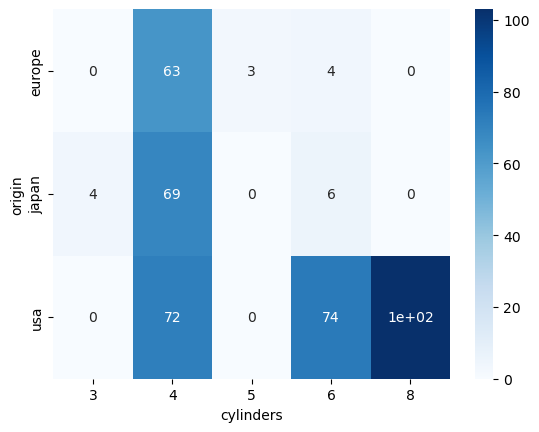

In [58]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True);

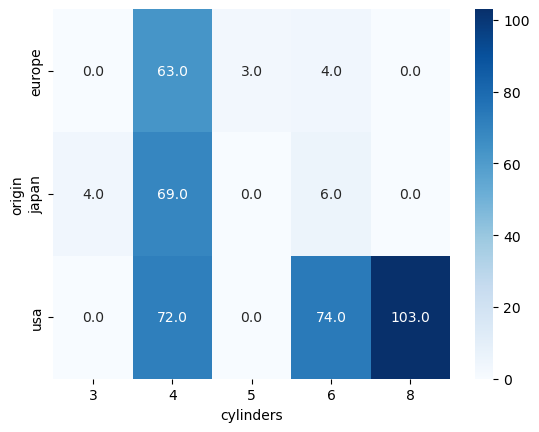

In [68]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt=".1f");  #fmt=".1f" for one decimal place

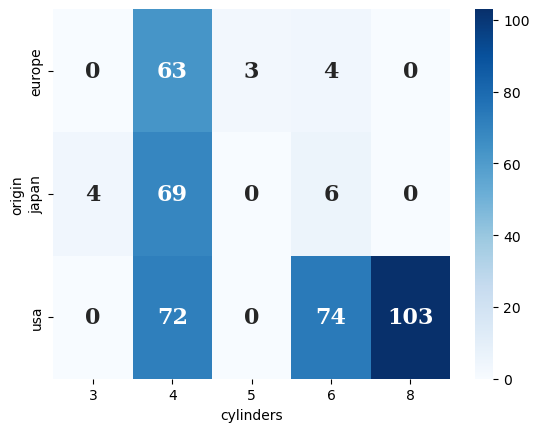

In [69]:
sns.heatmap(origin_cyl, 
            cmap='Blues', 
            annot=True, 
            fmt=".0f",
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif',
               # 'color': 'black'
            }
           );

## Styling

### linewidth

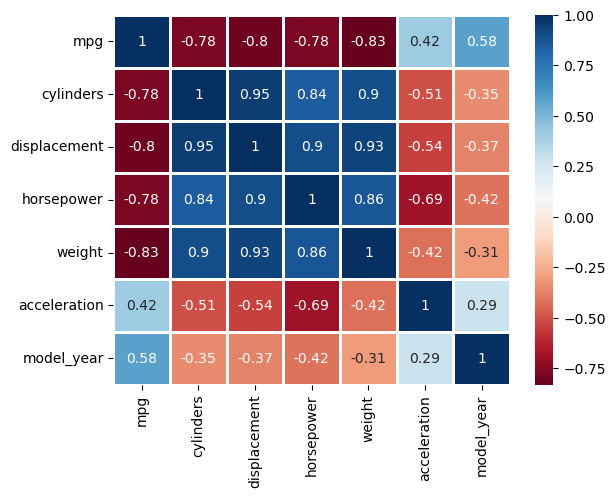

In [82]:
sns.heatmap(cars.corr(numeric_only=True), cmap='RdBu', linewidth=1, annot=True);

### linecolor

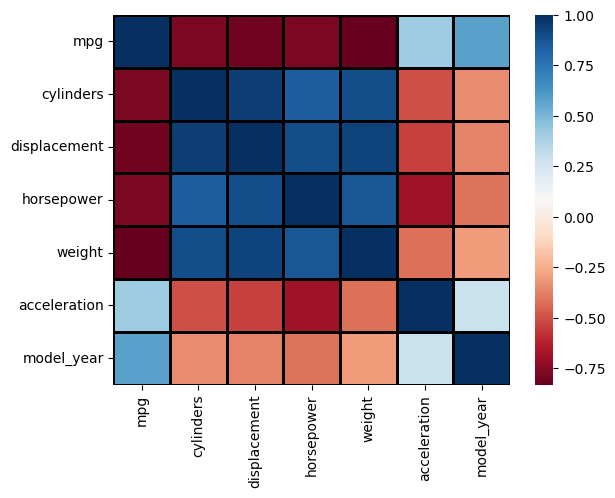

In [73]:
sns.heatmap(cars.corr(numeric_only=True), 
            cmap='RdBu', 
            linewidth=1,
            linecolor='black'
           );

### Tick Labels

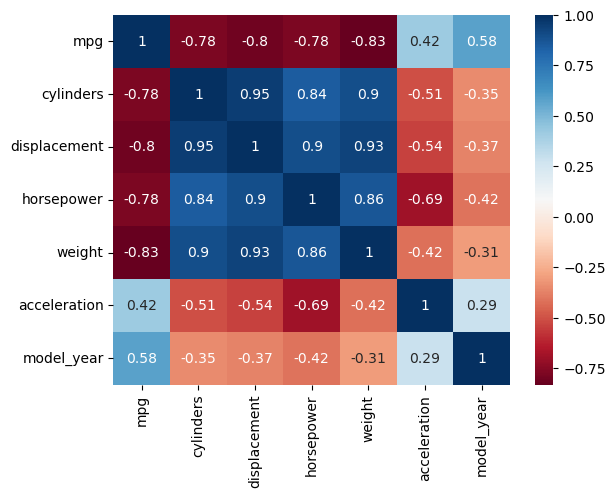

In [74]:
sns.heatmap(cars.corr(numeric_only=True), cmap='RdBu', annot= True);

In [78]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year'
         ]

#to manulally chnage the tick labels on the y and x axis

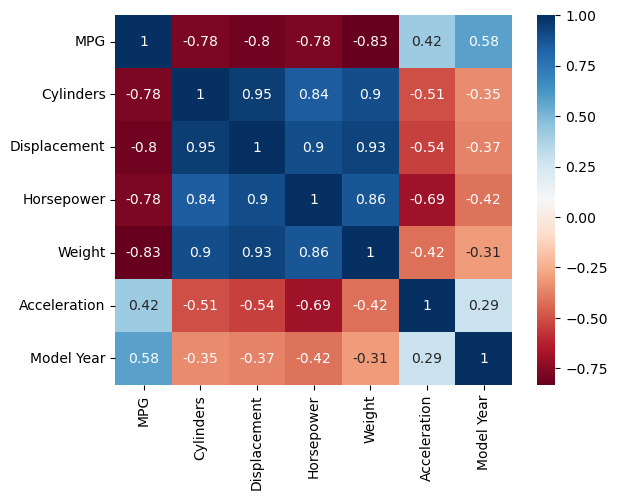

In [75]:
sns.heatmap(cars.corr(numeric_only=True), 
            cmap='RdBu',
            xticklabels=labels,
            yticklabels=labels,
            annot= True
           );

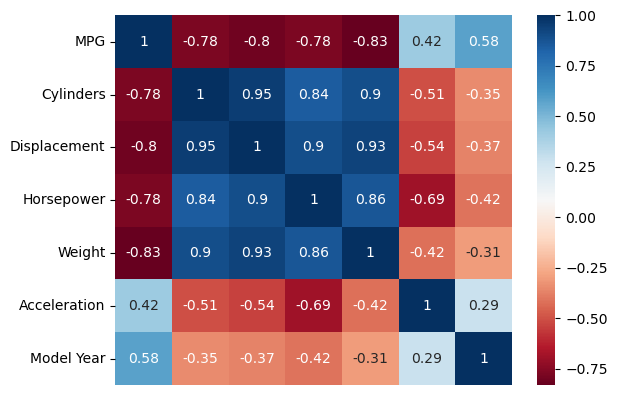

In [76]:
sns.heatmap(cars.corr(numeric_only=True), 
            cmap='RdBu', 
            xticklabels=False,
            yticklabels=labels,
            annot= True
           );

### square

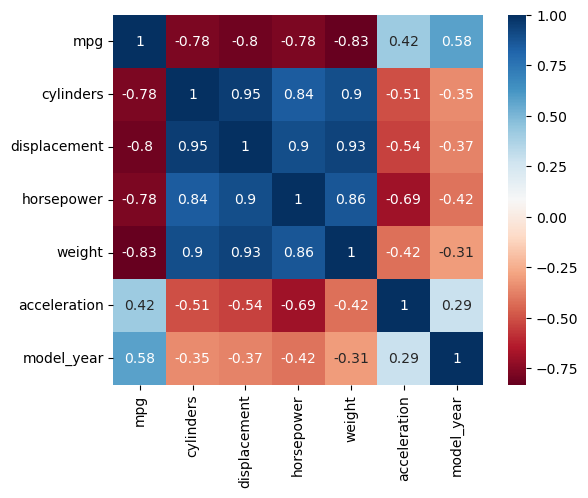

In [77]:
sns.heatmap(cars.corr(numeric_only=True), 
            cmap='RdBu',
            square=True,
            annot= True
           );

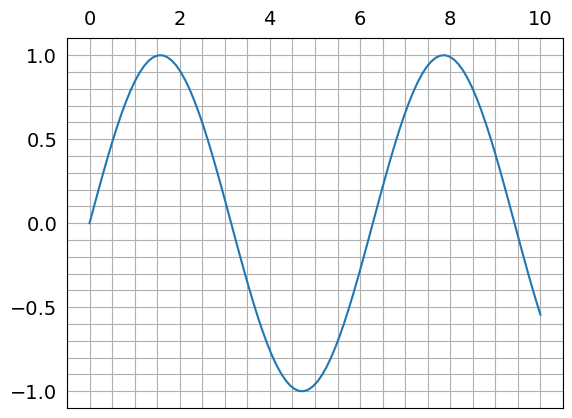

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a plot
plt.plot(x, y)

# Set major and minor ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))  # Major ticks every 2 units
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))  # Minor ticks every 0.5 units

plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))  # Major ticks every 0.5 units
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))  # Minor ticks every 0.1 units

# Enable the grid to see the ticks clearly
plt.grid(which='both')

plt.tick_params(
    which='both',       # Apply to both major and minor ticks
    bottom=False,       # Hide ticks on the bottom x-axis
    left=False,         # Hide ticks on the left y-axis
    labelbottom=False,  # Hide tick labels on the bottom x-axis
    labeltop=True       # Show tick labels on the top x-axis
)


# Show the plot
plt.show()
